In [61]:
# 기초 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action = 'ignore') # 경고 메세지 무시

import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic') # 한글깨짐방지
matplotlib.rc('axes', unicode_minus = False) # 마이너스 기호 깨짐 방지
 # rc = rcParams 설정



1. 데이터 로드

In [15]:
# 임시로 하나만 우선 살펴보기
data = pd.read_csv("C:/Users/SAMSUNG/Desktop/소상공인시장진흥공단_상가(상권)정보_20221231 (2)/소상공인시장진흥공단_상가(상권)정보_부산_202212.csv", encoding = 'utf-8')
data.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23206623,미광장,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,...,2611012600100250001004473,NaN,부산광역시 중구 보수대로44번길 5,600074,48974.0,NaN,NaN,NaN,129.023668,35.100979
1,20418637,BHC치킨,동래점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2626010500101850000016529,NaN,부산광역시 동래구 동래로147번길 18,607020,47802.0,NaN,NaN,NaN,129.087156,35.205267
2,24659633,스텔라,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,...,2650010500101480004001694,비치아파트,부산광역시 수영구 광안해변로 100,613751,48305.0,NaN,NaN,NaN,129.115397,35.143770
3,17174094,도란도란,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2623011100101740004050547,NaN,부산광역시 부산진구 가야대로482번길 29-3,614813,47327.0,NaN,NaN,NaN,129.024938,35.151645
4,21683903,럭키사진관,NaN,F,생활서비스,F06,사진,F06A01,사진관,M73301,...,2638010200103250030010858,NaN,부산광역시 사하구 낙동대로 395,604830,49411.0,NaN,1,NaN,128.974794,35.102905


In [17]:
data.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [33]:
# 분석에 필요한 columns 고르기

data_columns = ['상가업소번호', '상호명','지점명', '상권업종대분류명','상권업종중분류명','시도명','시군구명','행정동명','경도','위도']
data = data[data_columns]
data

,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,23206623,미광장,NaN,숙박,모텔/여관/여인숙,부산광역시,중구,부평동,129.023668,35.100979
1,20418637,BHC치킨,동래점,음식,닭/오리요리,부산광역시,동래구,복산동,129.087156,35.205267
2,24659633,스텔라,NaN,소매,의복의류,부산광역시,수영구,남천2동,129.115397,35.143770
3,17174094,도란도란,NaN,음식,한식,부산광역시,부산진구,개금1동,129.024938,35.151645
4,21683903,럭키사진관,NaN,생활서비스,사진,부산광역시,사하구,당리동,128.974794,35.102905
...,...,...,...,...,...,...,...,...,...,...
162555,19076189,리오마죠레,NaN,생활서비스,이/미용/건강,부산광역시,해운대구,반여1동,129.123373,35.203476
162556,19076390,메이미래쉬,NaN,생활서비스,이/미용/건강,부산광역시,강서구,녹산동,128.835928,35.149797
162557,19077180,크라운호프,부산학장점,음식,유흥주점,부산광역시,사상구,학장동,128.979739,35.139354
162558,19077185,가배원커피,당리점,음식,커피점/카페,부산광역시,사하구,하단1동,128.973045,35.103424


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162560 entries, 0 to 162559
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상가업소번호    162560 non-null  int64  
 1   상호명       162559 non-null  object 
 2   지점명       23953 non-null   object 
 3   상권업종대분류명  162560 non-null  object 
 4   상권업종중분류명  162560 non-null  object 
 5   시도명       162560 non-null  object 
 6   시군구명      162560 non-null  object 
 7   행정동명      162560 non-null  object 
 8   경도        162560 non-null  float64
 9   위도        162560 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 12.4+ MB


In [26]:
set(data['상권업종대분류명'])

{'관광/여가/오락', '부동산', '생활서비스', '소매', '숙박', '스포츠', '음식', '학문/교육'}

In [27]:
set(data['상권업종중분류명'])

{'PC/오락/당구/볼링등',
 '가구소매',
 '가방/신발/액세서리',
 '가전제품소매',
 '가정/주방/인테리어',
 '개인/가정용품수리',
 '개인서비스',
 '건강/미용식품',
 '경마/경륜/성인오락',
 '광고/인쇄',
 '기타서비스업',
 '기타음식업',
 '기타판매업',
 '놀이/여가/취미',
 '닭/오리요리',
 '대중목욕탕/휴게',
 '대행업',
 '도서관/독서실',
 '모텔/여관/여인숙',
 '무도/유흥/가무',
 '물품기기대여',
 '민박/하숙',
 '법무세무회계',
 '별식/퓨전요리',
 '부동산중개',
 '부페',
 '분식',
 '분양',
 '사무/문구/컴퓨터',
 '사진',
 '사진/광학/정밀기기소매',
 '선물/팬시/기념품',
 '세탁/가사서비스',
 '스포츠/운동',
 '시계/귀금속소매',
 '실내운동시설',
 '실외운동시설',
 '애견/애완/동물',
 '양식',
 '연극/영화/극장',
 '예술품/골동품/수석/분재',
 '예식/의례/관혼상제',
 '요가/단전/마사지',
 '운동/경기용품소매',
 '운송/배달/택배',
 '운영관리시설',
 '유스호스텔',
 '유아교육',
 '유아용품',
 '유흥주점',
 '음/식료품소매',
 '음식배달서비스',
 '의복의류',
 '의약/의료품소매',
 '이/미용/건강',
 '인력/고용/용역알선',
 '일식/수산물',
 '자동차/이륜차',
 '자동차/자동차용품',
 '장례/묘지',
 '제과제빵떡케익',
 '종교용품판매',
 '종합소매점',
 '주유소/충전소',
 '주택수리',
 '중고품소매/교환',
 '중식',
 '책/서적/도서',
 '철물/난방/건설자재소매',
 '취미/오락관련소매',
 '캠프/별장/펜션',
 '커피점/카페',
 '패스트푸드',
 '페인트/유리제품소매',
 '평가/개발/관리',
 '학문교육기타',
 '학원-보습교습입시',
 '학원-어학',
 '학원-예능취미체육',
 '학원-음악미술무용',
 '학원-자격/국가고시',
 '학원-창업취업취미',
 '학원-컴퓨터',
 '학원기타',
 '한식'

In [34]:
# 상권업종중분류명 "커피점/카페"인 곳
df_coffee = data[data['상권업종중분류명'] == '커피점/카페']

# 다시 세팅
df_coffee.index = range(len(df_coffee))

print('부산광역시 내 커피 점문점 점포 수 :', len(df_coffee))
df_coffee.head()

부산광역시 내 커피 점문점 점포 수 : 7371


,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,20526716,투썸플레이스,대연점,음식,커피점/카페,부산광역시,남구,대연3동,129.097701,35.135963
1,15569639,더리터,수영점,음식,커피점/카페,부산광역시,수영구,남천1동,129.107896,35.141748
2,20055669,비움카페,NaN,음식,커피점/카페,부산광역시,기장군,기장읍,129.221668,35.189328
3,15599040,로카페,NaN,음식,커피점/카페,부산광역시,기장군,정관읍,129.164382,35.335824
4,25367699,콩카페,NaN,음식,커피점/카페,부산광역시,북구,구포3동,129.010423,35.195485


In [39]:
# 부산에 있는 스타벅스
df_starbucks = df_coffee[df_coffee['상호명'].str.contains('스타벅스')]
df_starbucks.index = range(len(df_starbucks))
print('부산 스타벅스 점포 수 :', len(df_starbucks))
df_starbucks.head()

부산 스타벅스 점포 수 : 118


,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,20514870,스타벅스,부산역점,음식,커피점/카페,부산광역시,동구,초량3동,129.040831,35.116346
1,23519928,스타벅스,부산연산역점,음식,커피점/카페,부산광역시,연제구,연산4동,129.083344,35.186967
2,23507810,스타벅스,연산중앙로점,음식,커피점/카페,부산광역시,연제구,연산5동,129.080677,35.185431
3,16219809,스타벅스,부산하단점,음식,커피점/카페,부산광역시,사하구,하단1동,128.968878,35.105350
4,12089006,스타벅스서면NC점,서면NC점,음식,커피점/카페,부산광역시,부산진구,전포1동,129.063037,35.157050


In [47]:
# 구별 스타벅스 수
a = df_starbucks['시군구명'].value_counts()
a

해운대구    33
부산진구    19
사하구      8
금정구      8
중구       8
연제구      6
남구       6
수영구      6
동래구      5
동구       4
기장군      4
사상구      3
강서구      3
서구       2
북구       2
영도구      1
Name: 시군구명, dtype: int64

지점 수에 따른 시각화

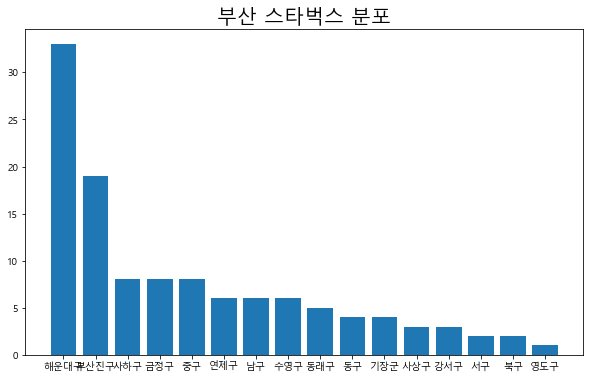

In [60]:
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic') # 한글깨짐방지
matplotlib.rc('axes', unicode_minus = False) # 마이너스 기호 깨짐 방지

plt.figure(figsize = (10,6))
plt.title('부산 스타벅스 분포', fontdict={'fontsize':20})
plt.bar(a.index, a.values)

plt.show()

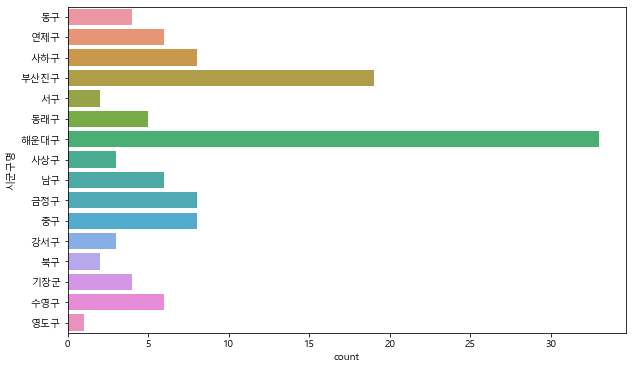

In [62]:
plt.figure(figsize = (10,6))
sns.countplot(data = df_starbucks, y='시군구명')
plt.show()

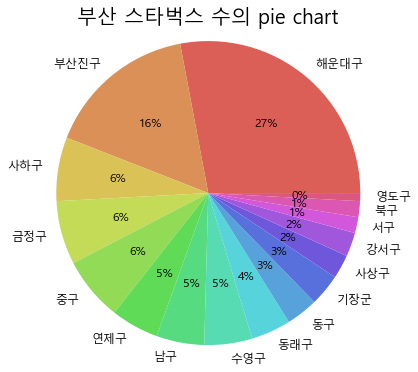

In [67]:
plt.figure(figsize = (6,6))
plt.pie(a.values,
       labels = a.index,
        autopct = '%d%%',
        colors = sns.color_palette('hls', len(a.index)),
        textprops = {'fontsize':12})
plt.axis('equal')
plt.title('부산 스타벅스 수의 pie chart', fontsize = 20)
plt.show()

지도 위에 시각화하기

In [68]:
df_starbucks.head(1)

,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,20514870,스타벅스,부산역점,음식,커피점/카페,부산광역시,동구,초량3동,129.040831,35.116346


In [69]:
# 스타벅스가 어디있는지 위도, 경도 활용해 나타내기
df_starbucks[['지점명','위도','경도']]

,지점명,위도,경도
0,부산역점,35.116346,129.040831
1,부산연산역점,35.186967,129.083344
2,연산중앙로점,35.185431,129.080677
3,부산하단점,35.105350,128.968878
4,서면NC점,35.157050,129.063037
...,...,...,...
113,해운대좌동점,35.177517,129.175547
114,영도대교점,35.094626,129.037287
115,부산대연못골점,35.136133,129.091920
116,해운대NC점,35.170597,129.177094


In [71]:
!pip install folium
# leaflet.js 기반 Python 지도 시각화 라이브러리

In [80]:
import folium

# 중심 지정
lat = df_starbucks['위도'].mean()
hard = df_starbucks['경도'].mean()

m = folium.Map( [lat, hard], zoom_start = 10) # zoom start : 확대정도(최대18)

# 지도 위에 표시
for i in df_starbucks.index:
    sub_lat = df_starbucks.loc[i, '위도']
    sub_hard = df_starbucks.loc[i, '경도']
    
    title = df_starbucks.loc[i, '지점명']
    
    # 지도에 데이터 찍어서 보여주기
    folium.Marker([sub_lat, sub_hard], tooltip = title).add_to(m)
     #tooltip : 마우스오버시 상세내용 표시
     #add_to(m) : # 마커 찍고싶은 좌표 구해와서 원본 m에다 표시/추가
m

In [92]:
# 동그라미 마크로 표시하기
n = folium.Map([lat, hard], zoom_start = 10, titles = 'Stamen')
 #titles = 'Stamen Toner', 'OpenStreetMap', 'Stamen' : 지도 이미지 종류

for i in df_starbucks.index:
    sub_lat = df_starbucks.loc[i, '위도']
    sub_hard = df_starbucks.loc[i, '경도']
    
    title = df_starbucks.loc[i, '지점명']
    
    folium.CircleMarker([sub_lat, sub_hard], color = 'yellow', radius = 4, tooltip = title).add_to(n)
    
n

In [98]:
# 코로플레스(단계구분도)를 위한 시/군/구별 좌표 json파일 가져오기
